# Сбор и разметка данных (семинары)
## Урок 9. Инструменты разметки наборов данных


**Задание 1.**

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

**Задание 2.**

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

**Задача 3.**

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

**Задача 4.**

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

**Задача 5.**

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

**Задача 6.**

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
data = pd.read_csv("7817_1.csv")

In [139]:
data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [140]:
data.isnull().sum()

id 0
asins 0
brand 0
categories 0
colors 823
dateAdded 0
dateUpdated 0
dimension 1032
ean 699
keys 0
manufacturer 632
manufacturerNumber 695
name 0
prices 0
reviews.date 380
reviews.doRecommend 1058
reviews.numHelpful 697
reviews.rating 420
reviews.sourceURLs 0
reviews.text 0
reviews.title 17
reviews.userCity 1597
reviews.userProvince 1597
reviews.username 17
sizes 1597
upc 699
weight 911
dtype: int64

In [141]:
data = data[['reviews.text','reviews.rating']]. copy ()
data[data['reviews.rating'] < 4]
data

,reviews.text,reviews.rating
0,I initially had trouble deciding between the p...,5.0
1,Allow me to preface this with a little history...,5.0
2,I am enjoying it so far. Great for reading. Ha...,4.0
3,I bought one of the first Paperwhites and have...,5.0
4,I have to say upfront - I don't like coroporat...,5.0
...,...,...
1592,This is not the same remote that I got for my ...,3.0
1593,I have had to change the batteries in this rem...,1.0
1594,"Remote did not activate, nor did it connect to...",1.0
1595,It does the job but is super over priced. I fe...,3.0


In [142]:
def rule_rating(row):
    if row["reviews.rating"] > 3:
        return  1
    elif row["reviews.rating"] <= 3: 
        return  0

In [143]:
data["Rating_label"] = data.apply(rule_rating, axis=1)

<Axes: >

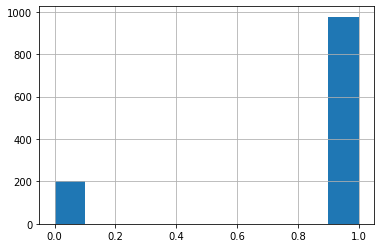

In [144]:
data['Rating_label'].hist()

In [145]:
data = data[data['reviews.rating'].notnull()]
data

,reviews.text,reviews.rating,Rating_label
0,I initially had trouble deciding between the p...,5.0,1.0
1,Allow me to preface this with a little history...,5.0,1.0
2,I am enjoying it so far. Great for reading. Ha...,4.0,1.0
3,I bought one of the first Paperwhites and have...,5.0,1.0
4,I have to say upfront - I don't like coroporat...,5.0,1.0
...,...,...,...
1592,This is not the same remote that I got for my ...,3.0,0.0
1593,I have had to change the batteries in this rem...,1.0,0.0
1594,"Remote did not activate, nor did it connect to...",1.0,0.0
1595,It does the job but is super over priced. I fe...,3.0,0.0


In [146]:
labeled_reviews, unlabeled_reviews = train_test_split(data, train_size=0.5, random_state=56)

In [147]:
def train_model(labaled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labaled_data['reviews.text'])
    y = labaled_data['Rating_label']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_reviews)

In [148]:
x_unlabeled = vect.transform(unlabeled_reviews['reviews.text'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [149]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainly = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [150]:
uncertainly

array([0.72454311, 0.51376282, 0.57844081, 0.70554491, 0.5548184 ,
 0.74345218, 0.73497813, 0.64328101, 0.73841751, 0.58994059,
 0.53288462, 0.52688091, 0.49058158, 0.52397031, 0.53833694,
 0.72804079, 0.40693874, 0.44804367, 0.7496287 , 0.99670486,
 0.4613849 , 0.56231735, 0.73087683, 0.53663986, 0.44378918,
 0.67802446, 0.74524154, 0.63250809, 0.64590216, 0.64827353,
 0.50759146, 0.5401531 , 0.40981217, 0.60562479, 0.613733 ,
 0.47178675, 0.72529422, 0.65346142, 0.53663986, 0.78441161,
 0.65311249, 0.52688091, 0.72554139, 0.44556874, 0.63162306,
 0.72105256, 0.51086655, 0.68311378, 0.7686628 , 0.40266889,
 0.64383097, 0.48141095, 0.41657774, 0.55006496, 0.61608715,
 0.42609639, 0.92323984, 0.69210711, 0.41258544, 0.85730536,
 0.70474546, 0.49539681, 0.59992178, 0.62431806, 0.6879064 ,
 0.50416051, 0.78485765, 0.49833494, 0.58264849, 0.56026928,
 0.7618359 , 0.5222697 , 0.32696786, 0.49539681, 0.66135862,
 0.63030411, 0.56794879, 0.45884572, 0.45161942, 0.58207464,
 0.54075541, 0.47165446, 0.50806045, 0.4895395 , 0.55311414,
 0.45161942, 0.77976763, 0.6652504 , 0.65194421, 0.43710485,
 0.28857988, 0.72693479, 0.74418164, 0.51582801, 0.77328265,
 0.59916792, 0.48141095, 0.5503072 , 0.71384973, 0.51895463,
 0.48038296, 0.46608523, 0.44948727, 0.60106114, 0.98872385,
 0.56026928, 0.81707034, 0.54385291, 0.62441563, 0.6278055 ,
 0.7543827 , 0.43358235, 0.51369858, 0.57667342, 0.45785308,
 0.67634378, 0.55781018, 0.69222033, 0.56794879, 0.57303612,
 0.52024021, 0.72564313, 0.55137017, 0.77328265, 0.50329205,
 0.77328265, 0.64085552, 0.45183338, 0.61377672, 0.57982034,
 0.65912761, 0.51944855, 0.49539681, 0.68001438, 0.52905495,
 0.64886333, 0.46889532, 0.80773386, 0.54734404, 0.44804367,
 0.56907196, 0.56436015, 0.55311414, 0.63534527, 0.56026928,
 0.58994059, 0.77114751, 0.40315261, 0.49731066, 0.6780739 ,
 0.49714087, 0.52688091, 0.51751136, 0.60623358, 0.76584342,
 0.75420117, 0.77328265, 0.79681375, 0.49539681, 0.43149799,
 0.61567024, 0.70856668, 0.75000403, 0.65373693, 0.45183338,
 0.83334181, 0.63534527, 0.5507644 , 0.74974986, 0.7822757 ,
 0.71373198, 0.45183338, 0.48820009, 0.55450588, 0.6410597 ,
 0.75974007, 0.74524154, 0.6021386 , 0.56907896, 0.70196846,
 0.50551933, 0.54985784, 0.6188042 , 0.49115198, 0.66340364,
 0.5371309 , 0.49940468, 0.7204183 , 0.60049168, 0.75904242,
 0.56026928, 0.52688091, 0.77328265, 0.98872385, 0.63030411,
 0.60358642, 0.56576545, 0.54560471, 0.60207442, 0.56907896,
 0.50642717, 0.68762751, 0.77328265, 0.52688091, 0.77146073,
 0.72136078, 0.79652349, 0.77328265, 0.62332454, 0.54728723,
 0.52766538, 0.5420224 , 0.77328265, 0.85193466, 0.77328265,
 0.49161716, 0.77328265, 0.46913748, 0.54166749, 0.64579438,
 0.70159057, 0.79681375, 0.47588907, 0.59349962, 0.47858034,
 0.68036644, 0.65017748, 0.39898629, 0.3887666 , 0.40265012,
 0.55677561, 0.53050508, 0.73323697, 0.67706631, 0.79115341,
 0.67802446, 0.64718385, 0.68429052, 0.65746897, 0.63466444,
 0.77328265, 0.45090267, 0.46977221, 0.62305403, 0.52938187,
 0.77221069, 0.58644464, 0.77328265, 0.55311414, 0.71936375,
 0.54878912, 0.65912761, 0.7498273 , 0.44417105, 0.48587179,
 0.58011568, 0.45476543, 0.5071469 , 0.37523026, 0.58187351,
 0.57025293, 0.81351865, 0.98528587, 0.38337068, 0.56907896,
 0.70107957, 0.5112068 , 0.52688091, 0.45643615, 0.65624402,
 0.59467972, 0.63423521, 0.63067978, 0.63351251, 0.77328265,
 0.48097826, 0.53324798, 0.38097235, 0.70074548, 0.61841921,
 0.74257214, 0.48537991, 0.7169269 , 0.64878068, 0.49209317,
 0.52440572, 0.7364617 , 0.81769986, 0.55155706, 0.50160325,
 0.62717584, 0.61789442, 0.59282488, 0.64736409, 0.3857125 ,
 0.52938187, 0.6864722 , 0.54927522, 0.51125001, 0.29595109,
 0.60379436, 0.48059138, 0.79239788, 0.56951519, 0.38317146,
 0.48141095, 0.51153191, 0.56026928, 0.66485137, 0.62535755,
 0.51443071, 0.61464371, 0.46118485, 0.64698022, 0.52966529,
 0.7496832 , 0.743517 , 0.46557513, 0.61572707, 0.88057137,
 0.59302955, 0.73994354, 0.62593541, 0.56026928, 0.61320549,
 0.64039665, 0.57281664, 0.4794

In [151]:
labeled_reviews_new = unlabeled_reviews.iloc[uncertainly.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainly.argsort()[100:]]

In [152]:
labeled_reviews = pd.concat([labeled_reviews, labeled_reviews_new])

In [153]:
model, vect = train_model(labeled_reviews)

In [154]:
reviews_test = unlabeled_reviews
reviews_test

,reviews.text,reviews.rating,Rating_label
680,This is quite the steal! As already pointed ou...,5.0,1.0
909,Love the fact that it has a rechargeable batte...,5.0,1.0
691,Having a tablet or a phone is inevitable in ou...,5.0,1.0
1411,"So far, this is doing what I wanted it to. I p...",5.0,1.0
674,The Fire HD 8 kids tablet is essentially an HD...,5.0,1.0
...,...,...,...
1138,"Doesn't understand some commands or Questions,...",3.0,0.0
1247,I was looking for just a Bluetooth speaker to ...,5.0,1.0
954,This item is exactly what I was looking for. I...,5.0,1.0
542,I bought this along with a fire tablet I purch...,5.0,1.0


In [155]:
x_test = vect.transform(reviews_test['reviews.text'])
y_test_predicted = model.predict(x_test)
y_test_predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [156]:
f1 = f1_score(reviews_test['Rating_label'], y_test_predicted)
f1

0.9271523178807948